In [324]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [329]:
#Creating variables
x = sp.symbols("x")
y = sp.symbols("y")
t = sp.symbols("t")
v0 = sp.symbols("v_0")
alpha1 = sp.symbols("alpha_1")
alpha2 = sp.symbols("alpha_2")
g = sp.symbols("g")

In [330]:
#Vận tốc ban đầu theo hai phương
vx0 = v0*sp.cos(alpha1)
vy0 = v0*sp.sin(alpha1)
#Vận tốc của phương y theo thời gian
vy_t = vy0 - g*t
#Tọa độ x và y theo thời gian
x_t = vx0*t
y_t = sp.integrate(vy_t,t)
#Tìm thời điểm chạm đất
T = sp.solve(y_t,t)[1]
#Quãng đường theo phương x đi được, gọi khoảng cách này là L1
L1 = sp.simplify(x_t.subs(t,T))
#Tương tự ta có khoảng cách L2 là khi thế alpha1 với alpha2
L2 = L1.subs(alpha1,alpha2)
L2

v_0**2*sin(2*alpha_2)/g

In [327]:
#Đặt L1 = L2 và tìm alpha2 theo alpha 1
sol = sp.solve(L1-L2,alpha2)[0] #Giải L1 - L2 = 0 và tìm biểu diễn của biến alpha2
alpha2 = sp.simplify(sol)
sol

-asin(sin(2*alpha_1))/2 + pi/2

In [328]:
#input alpha1
#inp1 = int(input("Nhập alpha1: "))
#inp2 = int(input("Nhập v0: "))
#tìm alpha2
inp1 = 0.4
inp2 = 2
a2 = float(alpha2.subs(alpha1,inp1))
a2


1.1707963267948966

In [331]:
#Thế các biến
T1 = float(T.subs([(g,9.81), (v0, inp2), (alpha1,inp1)]))
T2 = float(T.subs([(g,9.81), (v0, inp2), (alpha1,a2)]))

#hàm cho quỹ đạo 1
y_t1 = y_t.subs([(g,9.81), (v0,inp2), (alpha1,inp1)])
x_t1 = x_t.subs([(g,9.81), (v0,inp2), (alpha1, inp1)])
#hàm cho quỹ đạo 
y_t2 = y_t.subs([(g,9.81), (v0,inp2), (alpha1, a2)])
x_t2 = x_t.subs([(g,9.81), (v0,inp2), (alpha1, a2)])


In [332]:
#Plot

x1 = sp.lambdify(t, x_t1, 'numpy')
y1 = sp.lambdify(t, y_t1, 'numpy')
x2 = sp.lambdify(t,x_t2, 'numpy')
y2 = sp.lambdify(t, y_t2, 'numpy')

In [ ]:
x2(1)

0.778836684617301

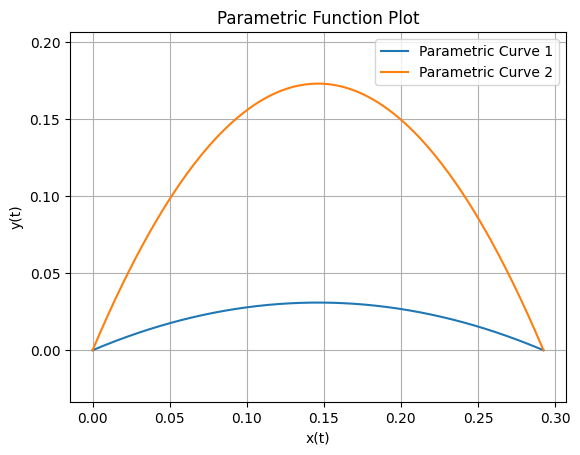

In [334]:
t1 = np.linspace(0,T1,500)
t2 = np.linspace(0,T2,500)
# Evaluate the second parametric functions

# Plot both curves
plt.plot(x1(t1), y1(t1), label='Parametric Curve 1')
plt.plot(x2(t2), y2(t2), label='Parametric Curve 2')
# Add labels, title, and legend
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Parametric Function Plot')
plt.legend()
plt.axis('equal')  # To ensure the aspect ratio is correct
plt.grid(True)
plt.show()
